## A/B Testing for E-Commerce Fashion Brand¶
To practice skills in A/B testing, I utilized a dataset designed for this purpose and created a fictional backstory for the company I will analyze.

ChicBeads
ChicBeads, a sister store to a popular online fashion retailer known for its trendy and affordable clothing, specializes in creating colorful beaded jewelry that complements many of the outfits sold at its sister store.

## Campaign Details:
- Control Campaign: The control campaign focused on traditional display ads featuring static images of their latest clothing collection.
- Test Campaign: The test campaign experimented with video ads showcasing short fashion shows and styling tips from influencers.

### Hypothesis: The Test Campaign will lead to a higher number of purchases compared to the Control Campaign due to different marketing strategies.

## Objectives
Primary Objective: Determine if there is a significant difference in the number of purchases between different campaigns ,Assess the impact of the campaigns on other metrics such as Website Clicks, Reach, and Add to Cart.

### Metrics:

- Number of purchases (key metric)
- AddtoCart
- WebsiteClicks
- Reach
- Cost Per Acquisition (CPA)
- Return on Investment (ROI)
- Click-Through Rate (CTR)
- Conversion Rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
control = pd.read_csv("control_group.csv", sep =";")
test = pd.read_csv("test_group.csv", sep = ";")

In [3]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
# exploration of control campaign data
control.info()
control.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [6]:
# exploration of test campaign data
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


### Cleaning Steps:
- Drop NAs
- Change data type of columns in control table from float64 to int64
- Combine two tables
- Edit column names and Remove "Campaign" from Campaign Name column
- Edit Date column

In [7]:
control.dropna(inplace = True)

In [8]:
change = ['# of Impressions', 'Reach','# of Website Clicks', '# of Searches',
          '# of View Content','# of Add to Cart', '# of Purchase']

for i in change:
    control[i] = control[i].astype('int64')

control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        29 non-null     object
 1   Date                 29 non-null     object
 2   Spend [USD]          29 non-null     int64 
 3   # of Impressions     29 non-null     int64 
 4   Reach                29 non-null     int64 
 5   # of Website Clicks  29 non-null     int64 
 6   # of Searches        29 non-null     int64 
 7   # of View Content    29 non-null     int64 
 8   # of Add to Cart     29 non-null     int64 
 9   # of Purchase        29 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [9]:
combined = pd.concat([control, test], ignore_index=True)
combined.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,6.08.2019,3083,109076,87998,4028,1709,1249,784,764


In [10]:
combined['Date'] = pd.to_datetime(combined['Date'], format='%d.%m.%Y').dt.date #
combined['Date'].head()
#.dt.date .dt.date returns a date object from the datetime object, which is a Python datetime.date type, not a pandas.Timestamp type.
# if you don't include the .dt.date part , then the Date column will be converted into a full datetime object that includes both the date and a default time of 00:00:00 like output : 2023-08-25 00:00:00

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-06
Name: Date, dtype: object

In [11]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        59 non-null     object
 1   Date                 59 non-null     object
 2   Spend [USD]          59 non-null     int64 
 3   # of Impressions     59 non-null     int64 
 4   Reach                59 non-null     int64 
 5   # of Website Clicks  59 non-null     int64 
 6   # of Searches        59 non-null     int64 
 7   # of View Content    59 non-null     int64 
 8   # of Add to Cart     59 non-null     int64 
 9   # of Purchase        59 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.7+ KB


In [16]:
NumCols_combined = combined.select_dtypes(include=['int64'])
num = NumCols_combined.columns
num

Index(['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks',
       '# of Searches', '# of View Content', '# of Add to Cart',
       '# of Purchase'],
      dtype='object')

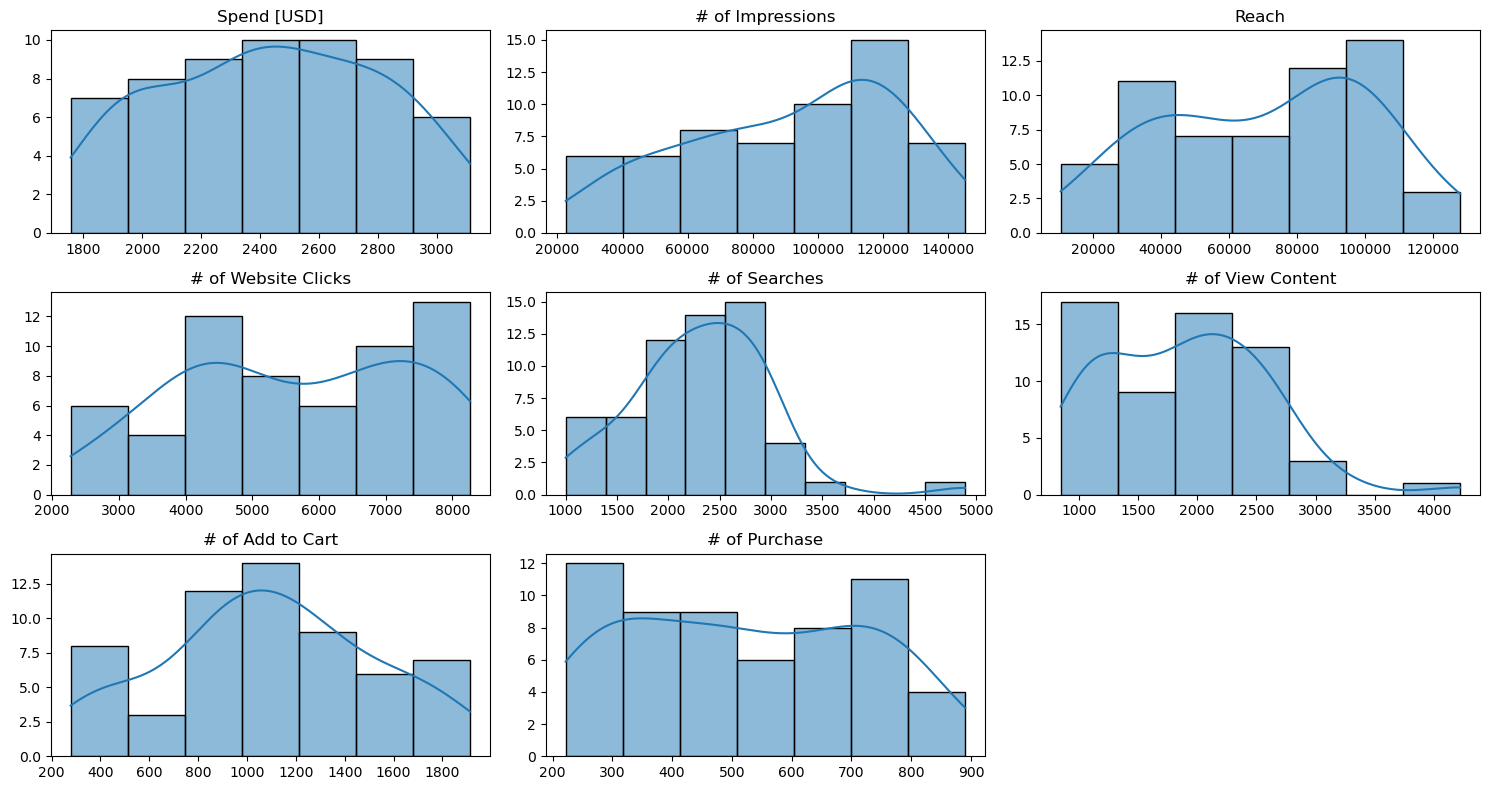

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(num):
    sns.histplot(data=combined, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

fig.delaxes(axs[8])
plt.tight_layout()
plt.show()

- In the Control Campaign it seems there is stronger correlation between Spend and Impressions/Reach. This could imply that the Control Campaign reaches a broader audience but this is not necessarily resulting in more people adding to cart.

- In the Test Campaign, Purchase and AddtoCart are stronlgy correlated. This is interesting because it not the case in the Control Campaign. But as we noted before, the control campaign reaches a broader audience, but does not necessarily increase the number of people adding to cart. But in the control campaign it seems that it is targeting a more specific audience which is resulting in a higher conversion rate.

- In both the Control Campaign and Test Campaign, Searches and View Content are stronlgy correlated, which possibly indicates that the advertisement matched what customers were searing for.
- In this campaign,the amount of spend does not necessarily correlate to higher Purchase rates. In fact, the amount of spend does not correlate to higher rates in most of the columns. But Spend does result in more people Adding to Cart (0.15) vs the Control Camaign (-0.065), and View Content (which makes sense as the test campaign aims to find customers and market products).
- Interesting to note, that the correlation between Searches, Viewed Content, Add to Cart, and Purchase indicate that the advertisement effectively communicated what the product was to the customer and it was what the customer was searching for.

<Axes: >

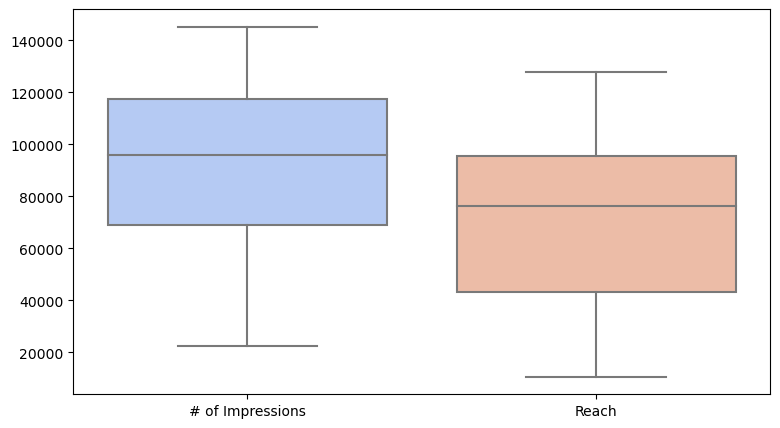

In [28]:
# Boxplots to Visualize Distributions and Outliers
# I will plot Impressions and Reach seperately for the sake of readability because their values are a lot larger
plt.figure(figsize=(9, 5))
sns.boxplot(data=combined[["# of Impressions" , "Reach"]],palette="coolwarm" )

<Axes: >

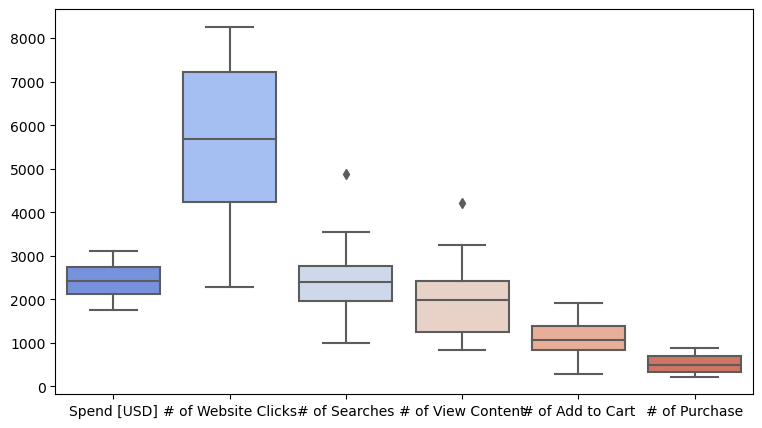

In [31]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=combined[['Spend [USD]','# of Website Clicks', '# of Searches', '# of View Content', 
                           '# of Add to Cart', '# of Purchase']],palette="coolwarm" )

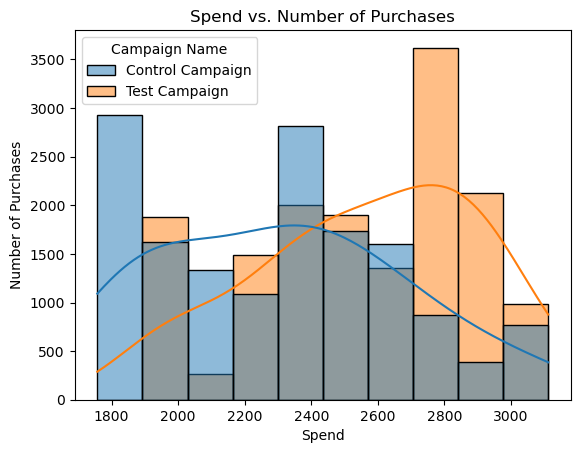

In [37]:
# I am curious to see if the amount of money spent on a campaign effects the number of purchases made
sns.histplot(data=combined, x="Spend [USD]", weights="# of Purchase", kde=True, hue="Campaign Name", alpha = 0.5)
plt.xlabel('Spend')
plt.ylabel('Number of Purchases')
plt.title('Spend vs. Number of Purchases')
plt.show()

### Test Campaign
Notice that it looks like the more money that is spent on the Test Campaign typically resulted in more purchases for the same cost as the Control Campaign. Also, this campaign has the max purchases out of the two, but it also has the min.
### Control Campaign
Notice that it looks like the less money that is spent on the Control Campaign typically resulted in more purchases for the same cost as the test group.

## statistical Test

#### Null Hypothesis
- (H0): There is no difference in the number of purchases between the Test Campaign and the Control Campaign.
#### Alternative Hypothesis
- (H1): The Test Campaign results in a higher number of purchases compared to the Control Campaign.

### we want to do either T-Test Or Mann-Whitney U Test.
Purpose: Compare the means of numerical variables between the Test and Control campaigns.

- T-Test: Use if the data is normally distributed.
- Mann-Whitney U Test: Use if the data is not normally distributed.

In [40]:
from scipy.stats import shapiro
alpha = 0.05 # significance level

def Check_if_Normally_Distributed(metric):
    '''Function to check if the data in the desired metric is normally distributed'''
    _, p_value = shapiro(combined[metric])
    print(f'\n{metric} Normality p-value: {p_value}')
    if p_value > alpha:
        print(f"{metric} is approximately normally distributed.")
    else:
        print(f"{metric} is not normally distributed.")

In [45]:
Check_if_Normally_Distributed('# of Purchase')


# of Purchase Normality p-value: 0.00506342388689518
# of Purchase is not normally distributed.


In [46]:
combined.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,2019-08-06,3083,109076,87998,4028,1709,1249,784,764


In [49]:
for metric in ['# of Website Clicks', 'Reach', '# of Add to Cart']:
    Check_if_Normally_Distributed(metric)


# of Website Clicks Normality p-value: 0.009599894285202026
# of Website Clicks is not normally distributed.

Reach Normality p-value: 0.04987848922610283
Reach is not normally distributed.

# of Add to Cart Normality p-value: 0.26233530044555664
# of Add to Cart is approximately normally distributed.


### Note that WebsiteClicks and Reach are not normally distributed, so I will use the Mann-Whitney U Test.
### Note that AddtoCart is normally distributed so I will use the two sample t-test

In [68]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu

def Run_Mann_Whitney(metric):
    '''Function to run Mann-Whitney U Test with desired metric'''
    test_metric = combined[combined['Campaign Name'] == 'Test Campaign'][metric]
    control_metric  = combined[combined['Campaign Name'] == 'Control Campaign'][metric]
    
    stat, p_value = mannwhitneyu(test_metric, control_metric)
    
    print(f'\nMann-Whitney U Test Statistic: {stat}')
    print(f'p-value: {p_value}')

    if p_value < alpha:
        print(f"There is a statistically significant difference in {metric} rates between the Test and Control campaigns.")
    else:
        print(f"There is no significant difference in {metric} rates between the Test and Control campaigns.")

In [69]:
Run_Mann_Whitney('# of Purchase')


Mann-Whitney U Test Statistic: 431.0
p-value: 0.957674926453464
There is no significant difference in # of Purchase rates between the Test and Control campaigns.


Based on the results of the Mann-Whitney U Test:

- The P-value is 0.9577, which is greater than the significance level of 0.05
- Therefore, we fail to reject the null hypothesis

In [73]:
# same for other
Run_Mann_Whitney('# of Website Clicks')
Run_Mann_Whitney('Reach')


Mann-Whitney U Test Statistic: 533.0
p-value: 0.13932985609787188
There is no significant difference in # of Website Clicks rates between the Test and Control campaigns.

Mann-Whitney U Test Statistic: 151.0
p-value: 1.7202314302800555e-05
There is a statistically significant difference in Reach rates between the Test and Control campaigns.


### T-test
Purpose: to determine whether there are statistically significant differences between the means of two independent groups (assumes normality)

In [76]:
from scipy.stats import ttest_ind

def Run_Two_Sample_TTest(metric):
    '''Function to run Two Sample T-Test with desired metric'''
    test_metric = combined[combined['Campaign Name'] == 'Test Campaign'][metric]
    control_metric  = combined[combined['Campaign Name'] == 'Control Campaign'][metric]
    
    t_stat, p_value = ttest_ind(test_metric, control_metric) 
    print(f'\nT-statistic: {t_stat}')
    print(f'p-value: {p_value}')

    if p_value < alpha:
        print(f"The difference in {metric} rates between Test and Control is statistically significant.")
    else:
        print(f"There is no significant difference in {metric} rates between Test and Control.")

In [78]:
Run_Two_Sample_TTest('# of Add to Cart')


T-statistic: -4.24906420944249
p-value: 8.032960071149041e-05
The difference in # of Add to Cart rates between Test and Control is statistically significant.


# Recap

### From Visualizations
- The control campaign reaches a broader audience, but that does not result in more people adding to cart. The test campaign seems to be more focused, resulting in a stronger correlation between Add to Cart and Purchase.
- The advertisement seems to be matching what customers are searching for (this is inferred from the strong correlation between viewes, website clicks, add to cart)
- The Control Campaign is more cost effective than the Test Campaign
- The Test Campaign has the most sales 
- Recomened for Test Campaign to spend more, and Control Campaign to spend less.

### Mann-Whitney U Test/ Two Sample T-Test
- Purchase: There is no significant difference in Purchase rates between the Test and Control campaigns.
- WebsiteClicks: There is no significant difference in WebsiteClicks rates between Test and Control.
- Reach: The difference in Reach rates between Test and Control is statistically significant.
- AddtoCart: The difference in AddtoCart rates between Test and Control is statistically significant.

### Overall
- Control Campaign: Although the Control Campaign effectively reaches a broader audience, this does not result in higher Add to Cart or Purchase rates. The campaign is more cost-effective, indicated by a higher ROI and Conversion Rate.
- Test Campaign: The Test Campaign is more effective in converting viewers to customers, as seen in the strong correlation between Add to Cart and Purchase rates. The Test Campaign also has a higher CTR, indicating more engaged viewers.
- Reach and Add to Cart: Both metrics show statistically significant differences favoring the Test Campaign. Purchase and Website Clicks: No significant differences between campaigns.
- The return of the advertisement spend is higher in the Control Campaign than the test campaign